This notebook is for testing code used to plot PV slices

In [1]:
#import packages
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy import wcs
from astropy.visualization.wcsaxes import WCSAxes
import astropy.units as u
import pvplot as pv
from astropy.io import ascii
import os
#ignore astropy warnings to make life easier
import warnings
from astropy.io.fits.verify import VerifyWarning
warnings.simplefilter('ignore', category=VerifyWarning)
warnings.simplefilter('ignore', UserWarning)

In [16]:
# get files that will allow to do mass versions of plots
shielddir = '/Users/adams/data/shield'
datadir = '/Users/adams/data/shield/slices'
datadir = '/Users/adams/data/shield/slices_opt' #the directory I put optical velocity frame ones into
rmsfile = 'shieldii_rms_name.txt'
table3file = 'table3.csv'
v21file = 'shield_v21.txt'

rms = ascii.read(os.path.join(shielddir,rmsfile))
print(rms.colnames)
table3 = ascii.read(os.path.join(shielddir,table3file),header_start=0,format='csv')
print(table3.colnames)
v21 = ascii.read(os.path.join(shielddir,v21file))
print(v21.colnames)
#print(table3)
#print(table3['AGC','Incl','Incl2','Vmax'])
print(len(table3),len(rms),len(v21))

for i in range(len(table3)):
    print(table3['AGC'][i],rms['AGC'][i],v21['AGC'][i])
    
#thank goodness everything is in same order!
#means I can be lazier

['AGC', 'rms']
['AGC', 'D (Mpc)', 'Duerr', 'Dlerr', 'S_HI', 'Incl', 'incl error', 'Incl2', 'incl2 error', 'Rmax', 'Rmax error', 'Vmax', 'Vmax error', 'Vrot', 'Vrot error', 'log10(M_HI)', 'log10(M_gas)', 'log10(M_dyn)', 'lMdyn_uerr', 'lMdyn_lerr', 'W50']
['AGC', 'V21']
18 18 18
102728 102728 102728
123352 123352 123352
198507 198507 198507
198508 198508 198508
198691 198691 198691
200232 200232 200232
205590 205590 205590
223231 223231 223231
223254 223254 223254
229053 229053 229053
229379 229379 229379
238890 238890 238890
731448 731448 731448
731921 731921 731921
739005 739005 739005
740112 740112 740112
742601 742601 742601
747826 747826 747826


1.8 566.0 km / s 22.0 km / s
Plots failed for AGC102728, need to investigate
1.3 467.0 km / s 40.0 km / s
Saving figure as 123352_pv_major_minor.pdf
1.6 502.0 km / s 42.0 km / s
Saving figure as 198507_pv_major_minor.pdf
1.3 519.0 km / s 30.0 km / s
Saving figure as 198508_pv_major_minor.pdf
1.6 514.0 km / s 35.0 km / s
Saving figure as 198691_pv_major_minor.pdf
1.2 450.0 km / s 52.0 km / s
Saving figure as 200232_pv_major_minor.pdf
1.1 494.0 km / s 37.0 km / s
Saving figure as 205590_pv_major_minor.pdf
1.3 571.0 km / s 35.0 km / s
Saving figure as 223231_pv_major_minor.pdf
1.2 603.0 km / s 40.0 km / s
Saving figure as 223254_pv_major_minor.pdf
1.2 425.0 km / s 60.0 km / s
Saving figure as 229053_pv_major_minor.pdf
2.3 624.0 km / s 35.0 km / s
Saving figure as 229379_pv_major_minor.pdf
1.3 360.0 km / s 40.0 km / s
Saving figure as 238890_pv_major_minor.pdf
99.0 540.0 km / s 0.0 km / s
Plots failed for AGC731448, need to investigate
1.3 504.0 km / s 70.0 km / s
Saving figure as 731921_p

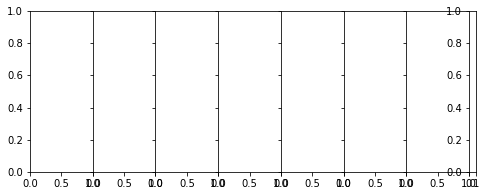

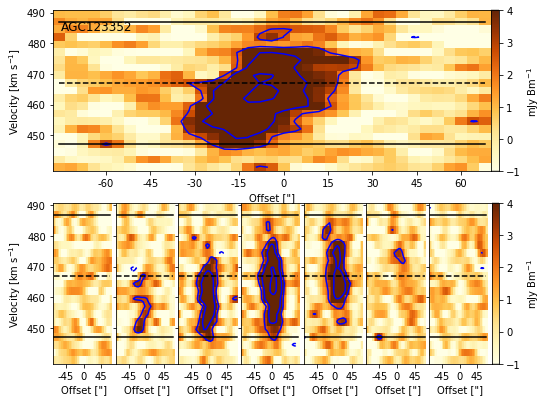

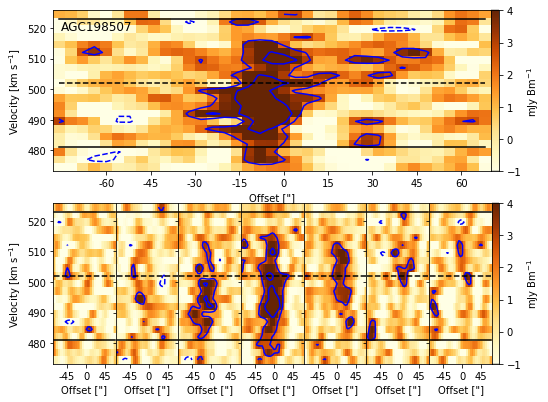

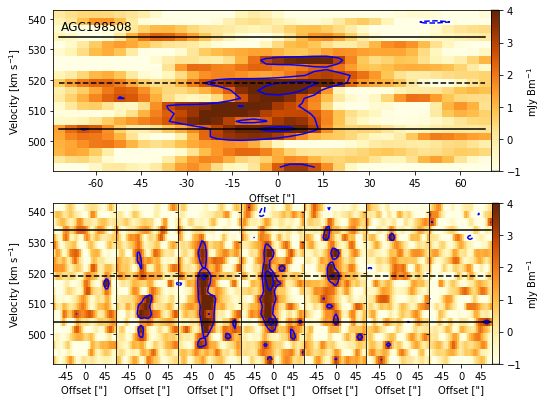

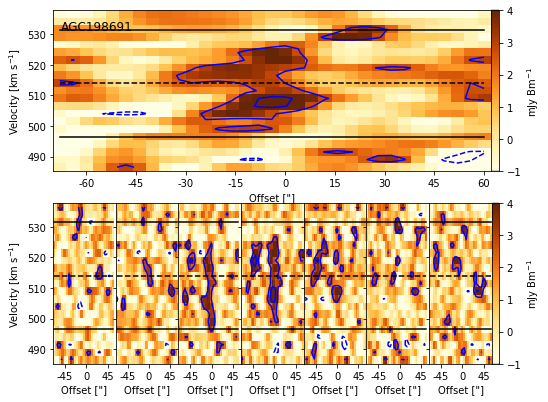

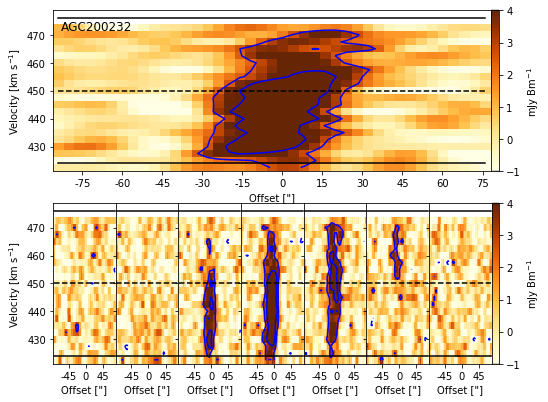

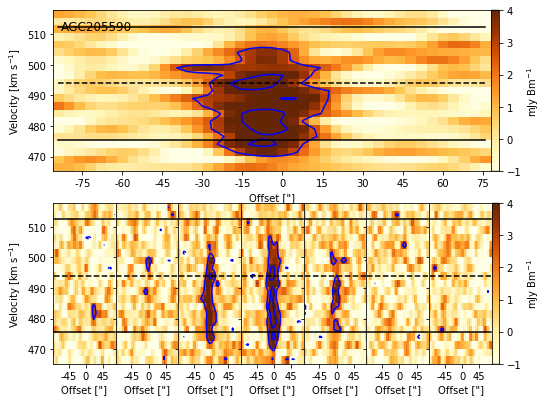

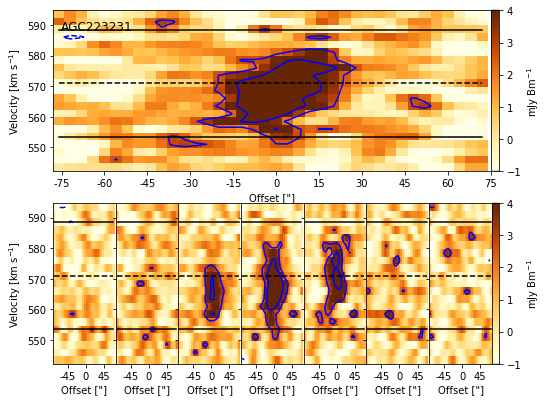

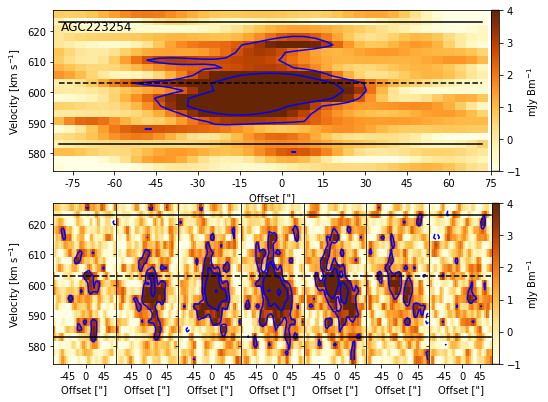

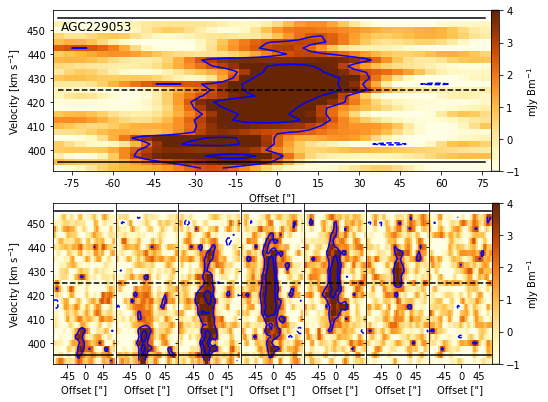

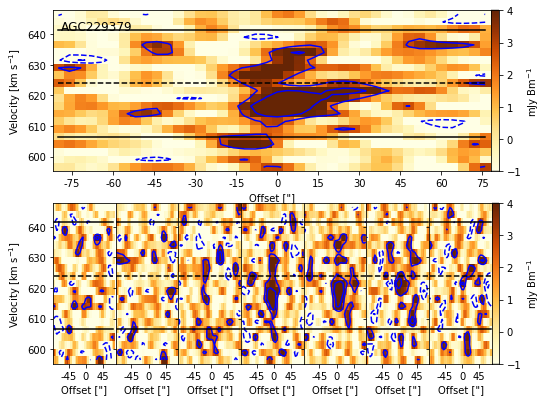

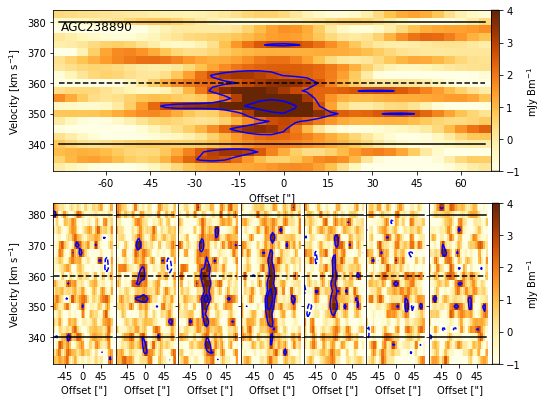

<Figure size 576x468 with 0 Axes>

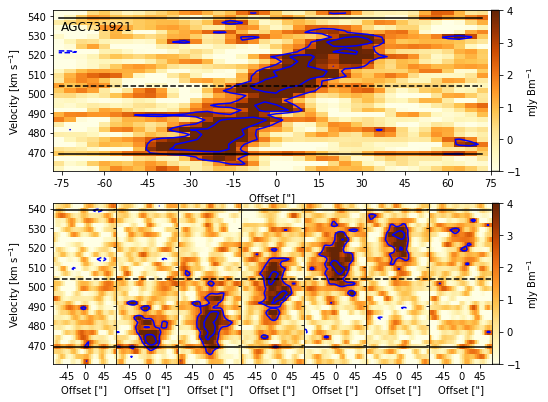

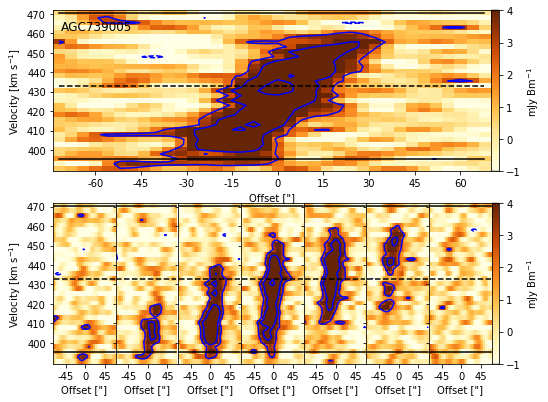

<Figure size 576x468 with 0 Axes>

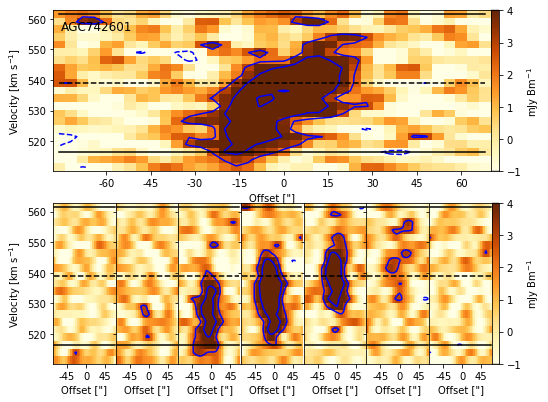

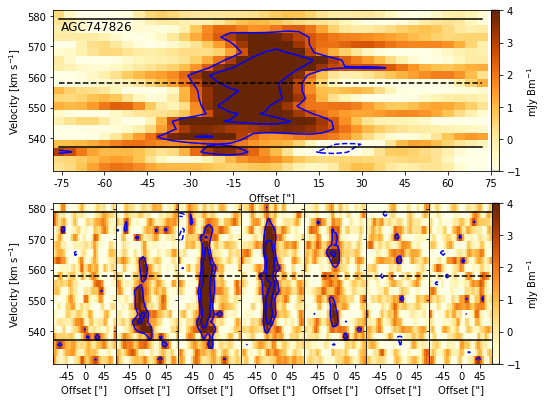

In [17]:
#Iterate over sources and make plots
for i,agc in enumerate(rms['AGC']):
    noise = rms['rms'][i]
    cenvel = v21['V21'][i]*u.km/u.s
    vmax = table3['Vmax'][i]*u.km/u.s
    print(noise,cenvel,vmax)
    try:
        fig = pv.plot_major_minor(agc,datadir=datadir,cenvel=cenvel,
                                  velmax=vmax)
    except:
        print('Plots failed for AGC{}, need to investigate'.format(agc))


First, try to just make plots for a single source. Then create a function and wrap nicely

In [4]:
#define data locations
datadir = '/Users/adams/data/shield/slices_opt'
agc = '123352'


Saving figure as 123352_pv_major_minor.pdf


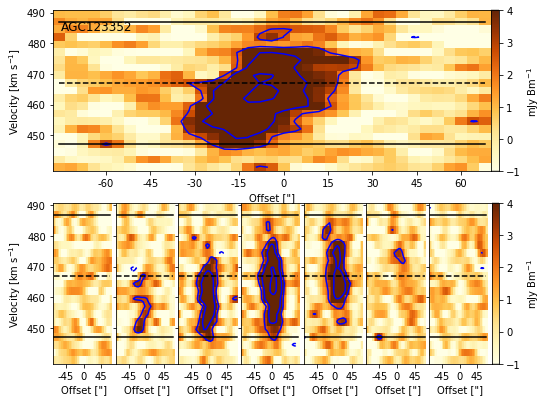

In [5]:
fig = pv.plot_major_minor(agc,datadir=datadir,cenvel=467*u.km/u.s,
                         velmax=40*u.km/u.s)

In [6]:
#Open a fits file to use the header for axes info
#starting with minor
f = fits.open('{0}/{1}.min1.fits'.format(datadir,agc))
hminor = f[0].header
f = fits.open('{0}/{1}.maj.fits'.format(datadir,agc))
hmajor = f[0].header
data = f[0].data
print(data.shape)

#print(hminor)

w = wcs.WCS(hminor,naxis=2)
w.wcs.print_contents()
print(w.wcs.name)
print(w)

print(hminor['NAXIS1'])
print(hminor['CDELT1'])

print(hminor['CDELT2'])
print(hmajor['CDELT2'])

wmajor = wcs.WCS(hmajor)
print(wmajor)

(1, 21, 37)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'OFFSET'  'VOPT'  
CRVAL : 0.0  441999.9999999  
CRPIX : 19.0  1.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 4.000000239398  2500.000000002  
NAXIS : 37  21  1
37
4.000000239398
2500.000000002
2500.000000002
WCS Keywords

Number of WCS axes: 3
CTYPE : 'OFFSET'  'VOPT'  'STOKES'  
CRVAL : 0.0  441999.9999999  1.0  
CRPIX : 19.0  1.0  1.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 4.000000239413  2500.000000002  1.0  
NAXIS : 37  21  1


Set OBSGEO-B to    52.916916 from OBSGEO-[XYZ].
Set OBSGEO-H to        1.987 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [7]:
def get_offset_vals(header,sep=15*u.arcsec,headerunit = u.arcsec, 
                    naxis='NAXIS1', cdelt='CDELT1', crval = 'CRVAL1', crpix='CRPIX1'):
    """
    Take a header object and return an array of offset values
    Inputs:
        header: header object from astropy.fits
        sep (float, angular unit): separation for values in an angular unit
        headerunit (float, angular unit): Unit for header for offset axis
        naxis (str): naxis in header, default='NAXIS1'
        cdelt (str): cdelt in header, default='CDELT1'
    Outputs:
        offset_vals (nparray): Array of offset values (floats)
        offsetunit: Unit for separation values
    """
    total_offset = header[naxis] * header[cdelt] * headerunit
    print(total_offset)
    nticks = np.floor(total_offset / sep)
    print(nticks)
    #check if odd or not - want odd tick marks
    #if even, add 1 tick (since I did floor before)
    if nticks % 2 == 0:
        nticks = nticks + 1
    print(nticks)
    #set up array for values
    offset_vals = (np.arange(nticks) - np.floor(nticks/2)) * sep.value
    offsetunit = sep.unit

    #also get tick values that go with
    offset_ticks = (((offset_vals*offsetunit).to(headerunit) - header[crval]*headerunit) 
                    / (header[cdelt]*headerunit) + header[crpix])
    
    return offset_vals,offsetunit, offset_ticks
        

In [8]:
vals, unit, ticks = get_offset_vals(hminor)
print(vals)
print(ticks)

148.00000885772602 arcsec
9.0
9.0
[-60. -45. -30. -15.   0.  15.  30.  45.  60.]
[ 4.0000009   7.75000067 11.50000045 15.25000022 19.         22.74999978
 26.49999955 30.24999933 33.9999991 ]


In [9]:
def get_vel_vals(header,sep=5*u.km/u.s,headerunit = u.m / u.s, 
                    naxis='NAXIS2', cdelt='CDELT2', crval = 'CRVAL2', crpix='CRPIX2'):
    """
    Take a header object and return an array of velocity values
    Inputs:
        header: header object from astropy.fits
        sep (float, vel unit): separation for values in a velocity unit
        headerunit (float, vel unit): Unit for header for velocity axis
        naxis (str): naxis in header, default='NAXIS2'
        cdelt (str): cdelt in header, default='CDELT2'
        crval (str): cdelt in header, default='CRVAL2'
        crpix (str): crpix in header, default='CRPIX2'
    Outputs:
        vel_vals (nparray): Array of velocity values (floats)
        velunit: Unit for separation values
    """
    total_velocity = header[naxis] * header[cdelt] * headerunit
    print(total_velocity)
    nticks = np.floor( (total_velocity.to(sep.unit) / sep) )
    print(nticks)
    #set starting value, go up to nearest sep value
    #implicitly assuming crpix is 1. should probably add a check for this
    extra_over = ((header[crval]*headerunit).to(sep.unit).value % sep.value)
    extra_over = ((header[crval]*headerunit).to(sep.unit) % sep)
    startval = (header[crval]*headerunit).to(sep.unit) + (sep - extra_over)
    print(startval)
    #set up array for values
    vel_vals = (np.arange(nticks)) * sep.value + startval.value
    velunit = sep.unit
    
    #also get tick values that go with
    vel_ticks = (((vel_vals*velunit).to(headerunit) - header[crval]*headerunit) 
                    / (header[cdelt]*headerunit) + header[crpix])
    return vel_vals,velunit, vel_ticks

In [10]:
vals, unit, ticks = get_vel_vals(hminor)
print(vals)
print(ticks)

52500.000000042 m / s
10.0
445.0 km / s
[445. 450. 455. 460. 465. 470. 475. 480. 485. 490.]
[ 2.2  4.2  6.2  8.2 10.2 12.2 14.2 16.2 18.2 20.2]


In [11]:
def get_tick_positions(header,offsetvals,velvals):
    """
    Use WCS and header to convert offsetvals, velvals to pixel coordiantes
    Inputs:
        header: header (astropy.fits)
        offsetvals (flt nparry): Array of offset values
    """
    

In [12]:
vals, unit, ticks = get_vel_vals(hminor)
print(vals)

52500.000000042 m / s
10.0
445.0 km / s
[445. 450. 455. 460. 465. 470. 475. 480. 485. 490.]


In [13]:
vals, unit = get_offset_vals(hmajor)
print(vals,unit)

148.00000885828098 arcsec
9.0
9.0


ValueError: too many values to unpack (expected 2)

In [ ]:
# initialize a figure instance
fig = plt.figure(figsize=(8,6))

#Open a fits file to use the header for axes info
#starting with minor
f = fits.open('{0}/{1}.min1.fits'.format(datadir,agc))
hminor = f[0].header
wcsminor = wcs.WCS(hminor,naxis=2) #ignore 3rd stokes axis
# initialize the physical grid for the plot
#7 slices
gridMinor = ImageGrid(fig, 212, (1,7), #ngrids=7,
                      cbar_mode="single", cbar_location='right',
                      cbar_size='12%', axes_pad=0.0,
                      #axes_class=(WCSAxes, dict(wcs=wcsminor)),
                      aspect=False, label_mode='L',share_all=True)

f = fits.open('{0}/{1}.maj.fits'.format(datadir,agc))
hmajor = f[0].header
wcsmajor = wcs.WCS(hmajor,naxis=2)
# and its grid and cosmetcs
gridMajor = ImageGrid(fig, 211, (1,1), #ngrids=1,
                      direction='column', cbar_mode="single",
                      cbar_location='right', cbar_size='2%',
                      axes_pad=0.0, 
                      #axes_class=(WCSAxes, dict(wcs=wcsmajor)),
                      aspect=False, share_all=True, label_mode='L')


#fix intensity range for everything
vmin = 0.0
vmax = 3
vmin=-2
vmax=4


# loop over all the minor axis slices
for i in range(1,8):
    # open the file and headers
    #print('{0}/{1}.min{2}.fits'.format(datadir,agc,i))
    f = fits.open('{0}/{1}.min{2}.fits'.format(datadir,agc,i))
    #get rid of third axies, which is first. grr.
    #squeeze so don't hve to know where empty axis is
    h, d = f[0].header, np.squeeze(f[0].data)
    #get wcs
    w = wcs.WCS(h,naxis=2)
    #print(np.nanmin(d)*1000.,np.nanmax(d)*1000.)
    ax = gridMinor[(i-1)]

    # define some properties of the image
    im = ax.imshow(d * 1000, # mJy/bm
                   aspect = 'auto',
                   vmin=vmin, vmax=vmax)
                   #origin='lower', # put x-axis below plot
                   #vmax=vmax, vmin=vmin, # call the scale range set above
                   #aspect='auto') 
                
                
#plot major axis
f = fits.open('{0}/{1}.maj.fits'.format(datadir,agc))
h, d = f[0].header, np.squeeze(f[0].data)
ax = gridMajor[0]

    # define some properties of the image
im = ax.imshow(d * 1000, # mJy/bm
               origin='lower', # put x-axis below plot
               vmax=vmax, vmin=vmin, # call the scale range set above
               aspect='auto') 